# A3

In [44]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint

In [2]:
def generate_data(d, n):
    # x_0' 
    x = np.random.normal(0,1,(1,d))
    x = x/np.linalg.norm(x)
    x = x[0]
    # Generate random Gaussian sample and normalize it
    z = np.random.normal(0,1,(n,d))  
    norm = np.linalg.norm(z,axis=1)
    z = z/norm.reshape(-1,1)
    y = np.sign(np.inner(x,z))
    return (z,y,x)



## E3.1


[-0.98135723  0.19219255]
0.001024558808951831
[-957.83397342  187.58567213]


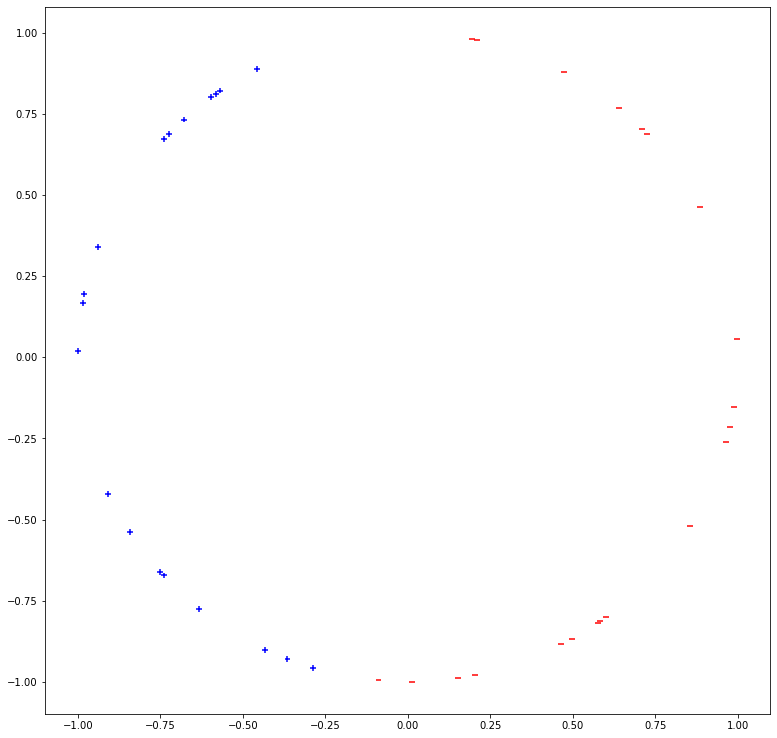

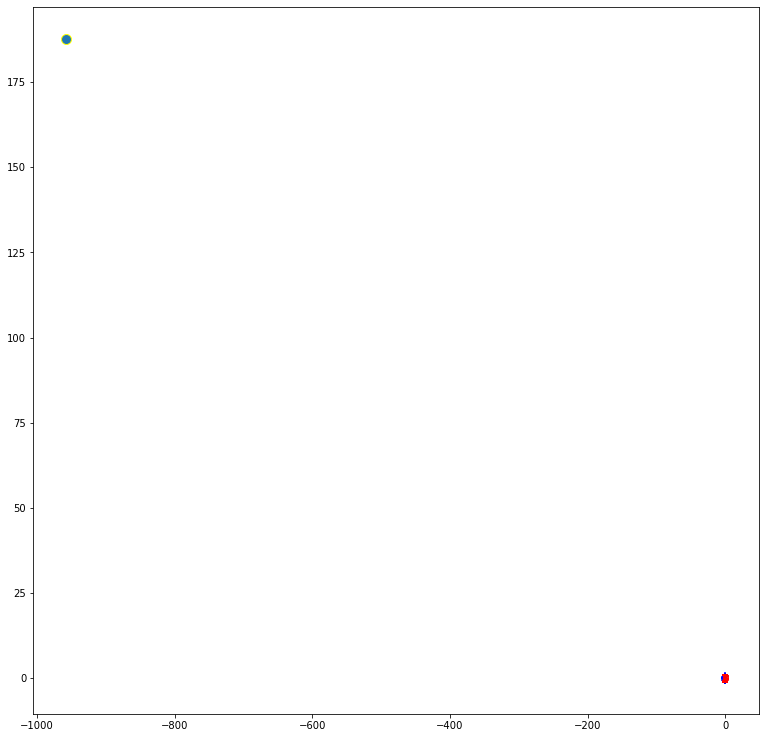

In [13]:
np.random.seed(100)
d = 2
N = 40
(z,y,x_0) = generate_data(d,N)
print(x_0)
# Calculate lambda and x_star
lambda_0 = np.amin(y*np.inner(x_0,z))
x_star = x_0/lambda_0
print(lambda_0)
print(x_star)

# Old code which plot datapoints and x_star as different figures, can't clearly visualize which side 
# does the x_star lies on.
# area1 = np.ma.masked_where(y < 0,y,copy=True)
# area2 = np.ma.masked_where(y > 0,y,copy=True)
# plt.scatter(z[:,0],z[:,1], s=area1*35, marker="+", c='blue')
# plt.scatter(z[:,0],z[:,1], s=(-1)*area2*35, marker="_", c='red')
# plt.show()
# plt.plot(x_star[0], x_star[1], marker="o", markersize=10, markeredgecolor="yellow")
# plt.show()
# Scatter plot of data points only
area1 = np.ma.masked_where(y < 0,y,copy=True)
area2 = np.ma.masked_where(y > 0,y,copy=True)
plt.scatter(z[:,0],z[:,1], s=area1*35, marker="+", c='blue')
plt.scatter(z[:,0],z[:,1], s=(-1)*area2*35, marker="_", c='red')
plt.show()
# Scatter plot of data points and x_star
area1 = np.ma.masked_where(y < 0,y,copy=True)
area2 = np.ma.masked_where(y > 0,y,copy=True)
plt.scatter(z[:,0],z[:,1], s=area1*35, marker="+", c='blue')
plt.scatter(z[:,0],z[:,1], s=(-1)*area2*35, marker="_", c='red')
plt.plot(x_star[0], x_star[1], marker="o", markersize=10, markeredgecolor="yellow")
plt.show()

<span style="color:red">9/10,I sucessfully generated a dataset with 40 samples, and plot the datapoints, then I calculated the correct x_star. The reason I deduct 1 point is I didn't plot dataset and x_star in the same figure, because I didn't know how to make the whole figure bigger when I did this assignment. If I just simply put them in one figure without fold the dead of the figure(I tried some methods but they don't work well), the unit circle will too tiny and can't see the labels clearly. I really need to be more familiar with matplotlib. I know improve this by plot one figure with datapoints only and one figure with datapoints and x_star.</span>

## E3.2

In [14]:
def gradient(yt,zt,x):
    if (1-yt*np.inner(zt,x) <= 0):
        return 0
    return -yt*zt


In [120]:
def SGD(T, z,y,learning_rate,x_0):
    n = np.shape(z)[0]
    d = np.shape(z)[1]
    x = np.zeros((T+1,d))
    x[0] = np.random.normal(0,1,(1,np.shape(z)[1]))
    x[0] = x[0]/np.linalg.norm(x[0])
    cl_SGD = np.zeros(T)
    empeirical_risk = np.zeros(np.floor(T/5).astype(int))
    zt_used = np.zeros((T,d))
    yt_used = np.zeros(T)
    # Loop for T times
    for t in range(T):
        random_index = np.random.randint(0,n)
        zt = z[random_index,:]
        yt_real = y[random_index]
        zt_used[t] = zt
        yt_used[t] = yt_real
        x[t+1] = x[t]-learning_rate*gradient(yt_real,zt,x[t])
        # the cumulative loss of SGD and the cumulative loss of x_star
        if (t > 0):
            cl_SGD[t] = cl_SGD[t-1] + np.maximum(0.0,1-yt_real*np.inner(zt,x[t+1]))
        else:
            cl_SGD[t] = np.maximum(0.0,1-yt_real*np.inner(zt,x[t+1]))
        if (t%5 == 0):
            # For every 5 rounds, compute empeirical risk for the whole dataset, p;ot it #(rounds) against it
            empeirical_risk[np.floor(t/5).astype(int)] = np.sum(np.fmax(np.zeros(n),1-y*np.inner(z,x[t+1])))/n
    lambda_0 = np.amin(yt_used*np.inner(x_0,zt_used))
    x_star = x_0/lambda_0
    cl_xstar = np.zeros(T)
    for i in range(T):
        if (i == 0):
            cl_xstar[i] = np.maximum(0,1-yt_used[i]*np.inner(x_star,zt_used[i]))
        else:
            cl_xstar[i] = cl_xstar[i-1] + np.maximum(0,1-yt_used[i]*np.inner(x_star,zt_used[i]))
    return (x,x_star,cl_SGD,cl_xstar,empeirical_risk)
        


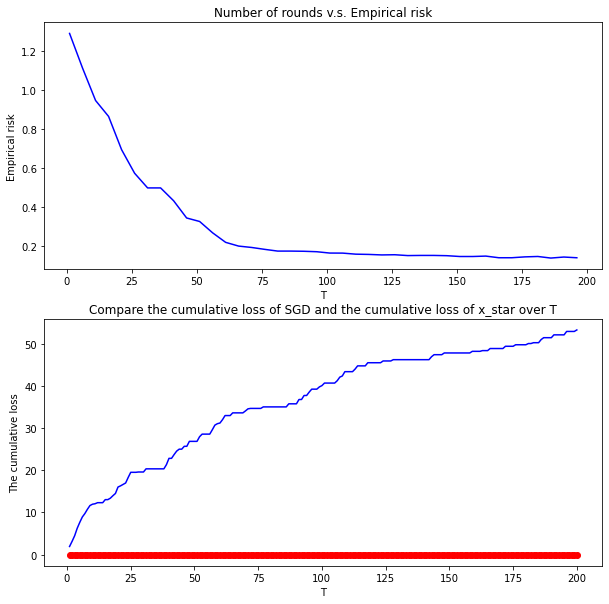

[-2.18910215  0.16622807]


In [123]:
T = 200
aita = 1/np.sqrt(T)
seq_T = np.arange(1,T+1)
seq_Tby5 = np.arange(1,T+1,5)
(x,x_star,cl_SGD,cl_xstar,empeirical_risk) = SGD(T,z,y,aita,x_0)
# Setting of plots
fig, axs= plt.subplots(2)
fig.set_size_inches(10, 10)
# plot#1
axs[0].set_title('Number of rounds v.s. Empirical risk')
axs[0].set_xlabel("T")
axs[0].set_ylabel("Empirical risk")
axs[0].plot(seq_Tby5,empeirical_risk,c='blue')
# plot#2
axs[1].set_title('Compare the cumulative loss of SGD and the cumulative loss of x_star over T') 
axs[1].set_ylabel("The cumulative loss")
axs[1].set_xlabel("T")
axs[1].scatter(seq_T,cl_xstar,c='red')
axs[1].plot(seq_T,cl_SGD,c='blue')
plt.show()
print(x[T]) # This is the final x

In plot#2, as T increases, the speed that the cumulative loss of SGD increases become slower and slower, and the cumulative loss of x_star remains 0, which implies that Regret = the cumulative loss of SGD in this case. This also remainds me that the Regret graph is sublinear.

<span style="color:red">6/10, correct SGD implementation and plot#1 but misunderstand what does plot#2 asked for and the calculation of x_star is wrong. The question want T as x-axis and plot the cumulative loss of SGD and the cumulative loss of x_star as two lines in one figure, but I ploted x_star v.s. the cumulative loss of SGD and calculated x_star with changing x not x_0ooiweqq. I should ask for clearfication when I feel confused on the requirement of the question.</span>

## E3.3


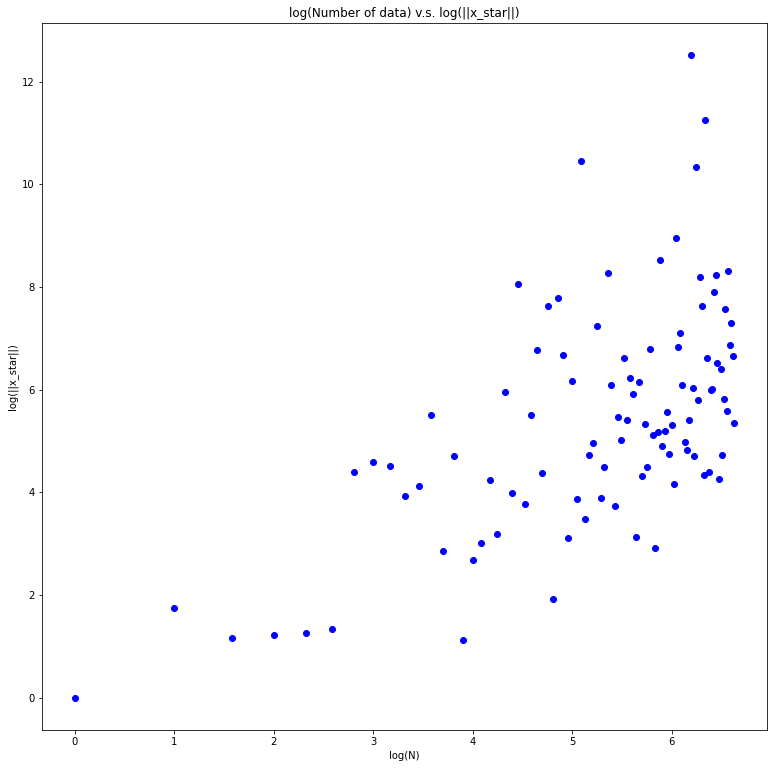

In [124]:
d = 2
fig, axs= plt.subplots(1)
axs.set_title('log(Number of data) v.s. log(||x_star||)')
axs.set_xlabel("log(N)")
axs.set_ylabel("log(||x_star||)")
for n in range(1,100):
    (z,y,x_0) = generate_data(d,n)
    lambda_0 = np.amin(y*np.inner(x_0,z))
    x_star = x_0/lambda_0
    norm_x_star = np.linalg.norm(x_star)
    axs.scatter(np.log2(n),np.log2(norm_x_star),c='blue')
plt.show()


The order of growth of ||x_star|| is about linear. ||x_star|| are concentrated at tail, this look like the left half of a normal distribution density curve.
Bound of Regret of SGD applied to the empirical risk minimization problem is (R||x_star||^2+1)/2sqrt(T). R = 1 in our case, so this is (||x_star||^2+1)/2sqrt(T) => Omega((R(N+1)^2+1)/sqrt(T)).
The geometric meaning of the inverse of the norm of x_star is the distance to the closest datapoint from hyperplane of x_0.

<span style="color:red">3/10, I didn't explain the distribution of ||x_star||, the the Regret bound and the geometric meaning of 1/||x_star|| is incorrect. I should try to explain more observation on the figure. I make the Regret wrong because I didn't copy the correct Regret from textbook, it should be 1/sqrt(T) not sqrt(T), this lead to the wrong conclusion. I didn't quit understand the meaning of lambda. I should be extra careful when I copy equation from textbook and note.</span>

## E3.4

In [125]:
def generate_data_modified(d, n, p):
    # x_0' 
    x = np.random.normal(0,1,(1,d))
    x = x/np.linalg.norm(x)
    x = x[0]
    # Generate random Gaussian sample and normalize it
    counter = 0 # Count #(datapoints in dataset)
    z = np.empty((n,d))
    y = np.empty(n)
    while counter < n:
        zi = np.random.normal(0,1,(1,d)).reshape(-1,d)  
        norm = np.linalg.norm(zi)
        zi = zi/norm
        yi = np.sign(np.inner(x,zi))
        if (np.absolute(np.inner(x,zi)) > p):
            z[counter] = zi
            y[counter] = yi
            counter += 1
    return (z,y,x)


[-0.98135723  0.19219255]
0.5004102963605495
[-1.9611052   0.38406994]


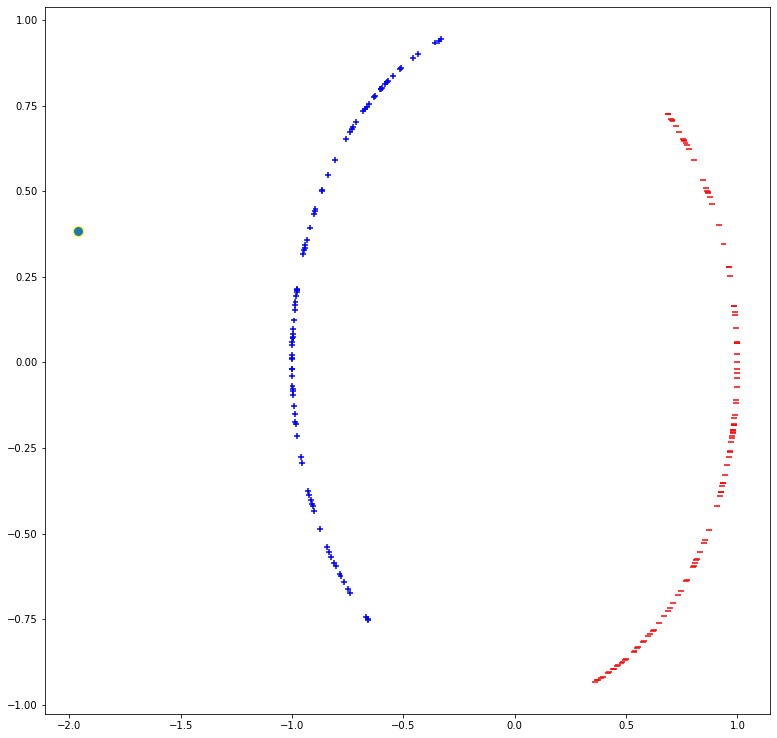

In [126]:
np.random.seed(100)
N = 200
d = 2
p = 0.5
(z,y,x_0) = generate_data_modified(d,N,p)
print(x_0)
# Calculate lambda and x_star
lambda_0 = np.min(y*np.inner(x_0,z))
x_star = x_0/lambda_0
print(lambda_0)
print(x_star)

# Scatter plot of data points
area1 = np.ma.masked_where(y < 0,y,copy=True)
area2 = np.ma.masked_where(y > 0,y,copy=True)
plt.scatter(z[:,0],z[:,1], s=area1*35, marker="+", c='blue')
plt.scatter(z[:,0],z[:,1], s=(-1)*area2*35, marker="_", c='red')
plt.plot(x_star[0], x_star[1], marker="o", markersize=10, markeredgecolor="yellow")
plt.show()

1. lambda > than p
2. No datapoints in the area that is closer than p distance of the hyperplane define by x_0

<span style="color:red">8/10, correct implementation and ploting, but didn't explain my finding on the figure. I should always explain my finding on figure, no matter the question explicitly ask for it or not.</span>

## E3.5

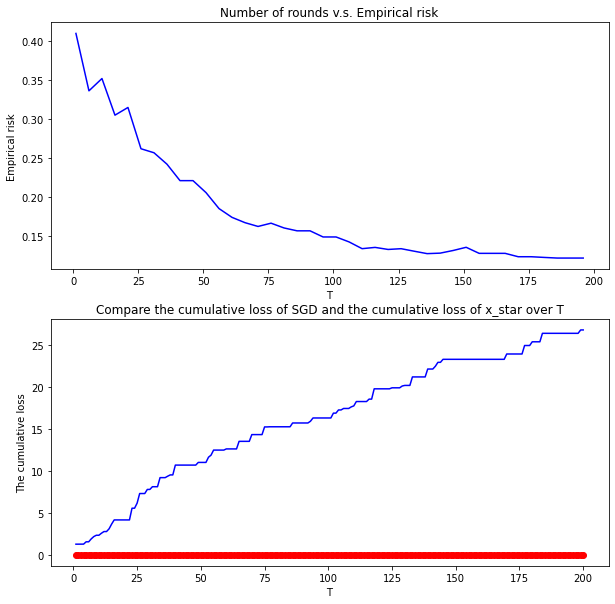

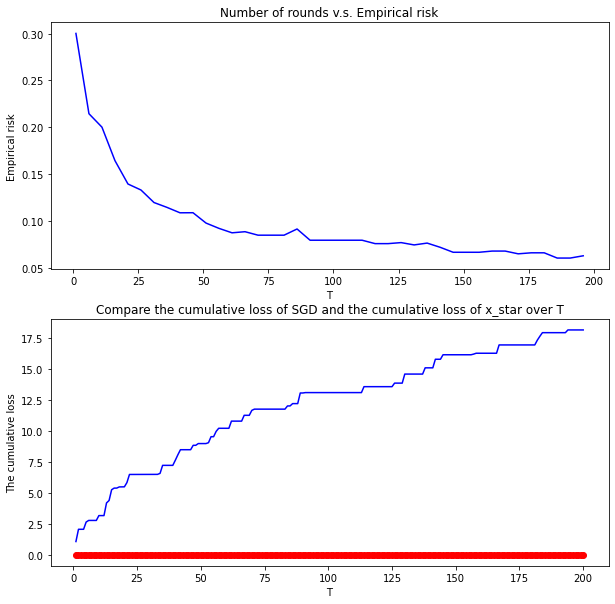

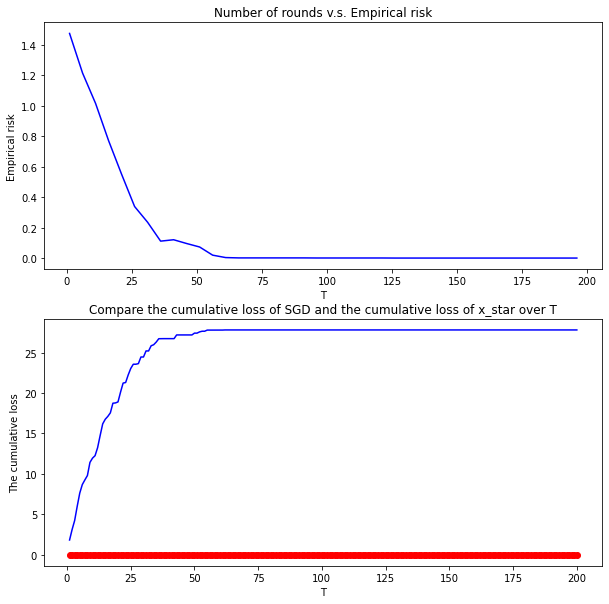

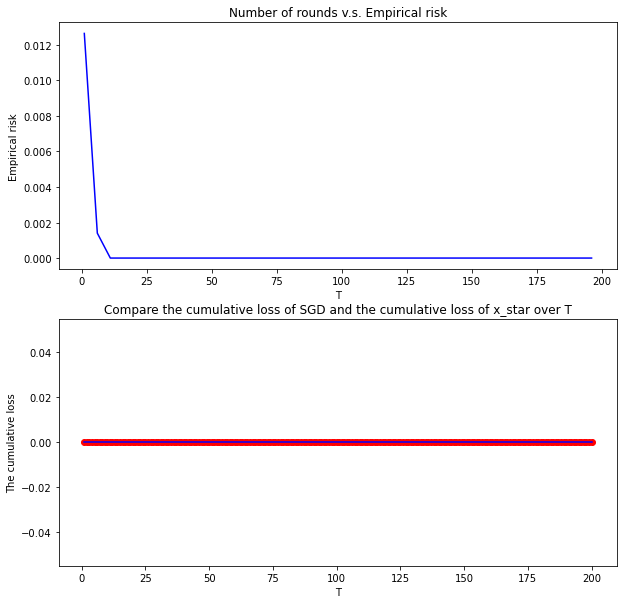

In [128]:
np.random.seed(100)
N = 40
d = 2
T = 200
aita = 1/np.sqrt(T)
p = np.array([0.0,0.1,0.5,0.9])
for i in p:
    (z,y,x_0) = generate_data_modified(d,N,i)
    (x,x_star,cl_SGD,cl_xstar,empeirical_risk) = SGD(T,z,y,aita,x_0)
    # Setting of plots
    fig, axs= plt.subplots(2)
    fig.set_size_inches(10, 10)
    # plot#1
    axs[0].set_title('Number of rounds v.s. Empirical risk')
    axs[0].set_xlabel("T")
    axs[0].set_ylabel("Empirical risk")
    axs[0].plot(seq_Tby5,empeirical_risk,c='blue')
    # plot#2
    axs[1].set_title('Compare the cumulative loss of SGD and the cumulative loss of x_star over T') 
    axs[1].set_ylabel("The cumulative loss")
    axs[1].set_xlabel("T")
    axs[1].scatter(seq_T,cl_xstar,c='red')
    axs[1].plot(seq_T,cl_SGD,c='blue')
    plt.show()



As the value of p increase, the number of mistake that SGD makes decreases since more points are condensed at loss=0 as p increases implies less mistake are made in SGD as p increases. 

<span style="color:red">10/10, I made the correct conclusion, but word "decrease" is better to be replaced by "shrink".</span>

# E3.6 3.7 See Handwriting

# Summary of Annotaion
## I should always explain more about my findings, more is better than less!